# 线性回归



线性模型是实践中经常使用的模型。虽然它主要用于回归，但也用于分类。本文主要讨论回归的线性模型。线性模型根据模型的方便函数对输出进行预测。让我们从高中的一个问题开始这个话题。以下几点之间的关系是什么？
(1,3) ，(2,5) ，(3,7) ，(4,9) ，(5,11)
这个问题由 x 值(1,2,3,4,5)和 x 值(3,5,7,9,11)对应的输出组成。很容易理解的是，输入和输出之间的简单关系是直线 y = 2x + 1的点，斜率为2。线性模型用于预测相应输入值的未来值。例如，我们可以预测输入(x)的输出(y) = 21 = 10。

我们创建一个随机的数据集，并使用 sklearn 库来拟合线性回归。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

MSE   :  0.9419426132261063
bias  :  [100.05206465]
weight:  [[9.8249167]]


Text(0, 0.5, 'output')

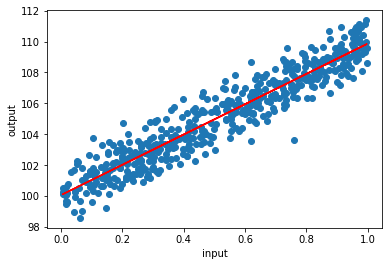

In [2]:
x = np.random.rand(500, 1)
y = 100 + 10 * x + np.random.randn(500, 1)

linear_regression = LinearRegression()
linear_regression.fit(x,y)
y_pred=linear_regression.predict(x)
MSE=np.square(np.subtract(y_pred,y)).mean()

print("MSE   : ",MSE)
print("bias  : ", linear_regression.intercept_)
print("weight: ",linear_regression.coef_)

plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.xlabel('input')
plt.ylabel('output')

## 均方误差

定义损失函数为均方误差(Mean Square Error, MSE)

$ MSE = \dfrac{1}{N} \displaystyle \sum_{i=1}^N (y_i- \hat{y}_i)^2$

目标是最小化均方误差

## 梯度下降

梯度下降法。其思想是通过迭代更新参数使代价函数最小化。该算法采用随机数初始化权值，并根据学习速率逐渐收敛到最小值。其中最重要的参数之一是学习率。如果选择的学习率太低，达到全局最小(最小成本)需要太多的时间; 如果调整的学习率太高，权重跳跃到最小成本附近，变得不稳定。

In [3]:
import time
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [4]:
def cal_cost(theta,x,y):
    m = len(y)
    predictions = x.dot(theta)
    cost = (1/m) * np.sum(np.square(predictions-y))
    return cost

In [5]:
@timeit
def gradient_descent(x, y, theta, eta=0.01, iterations=1000):
    data_len = len(y)
    for it in range(iterations):
        xtheta = np.dot(x, theta)
        theta = theta - (1 / data_len) * eta * (x.T.dot((xtheta - y)))
        cost = cal_cost(theta, x, y)
    return print("bias  :", theta[0],"\nweight:", theta[1],"\ncost  : ",cost)

In [6]:
lr = 0.5
n_iter = 1000
theta = np.random.randn(2, 1)
x_b = np.c_[np.ones((len(x), 1)), x]
gradient_descent(x_b, y, theta, lr, n_iter)

bias  : [100.05206465] 
weight: [9.8249167] 
cost  :  0.9419426132261065
'gradient_descent'  16.96 ms


In [7]:
lr = 0.1
n_iter = 1000
theta = np.random.randn(2, 1)
x_b = np.c_[np.ones((len(x), 1)), x]
gradient_descent(x_b, y, theta, lr, n_iter)

bias  : [100.01857779] 
weight: [9.88573359] 
cost  :  0.9422492256022503
'gradient_descent'  17.99 ms


## 批量梯度下降

梯度下降法通过在多特征数据集中使用偏导数最小化成本函数。这意味着成本函数是重新计算每个步骤的权重值，这个过程需要太多的时间。相比之下，在批处理梯度下降法中有一个梯度向量，并且在整个训练集的每个步骤中只更新这个向量。

In [8]:
@timeit
def batch_gradient_descent(x,y,theta,eta=0.01, iterations=1000):
    data_len = len(x)
    for iteration in range(iterations):
        xtheta = np.dot(x, theta)
        pred=xtheta-y
        gradients = 2/data_len * x.T.dot(pred)
        theta = theta - eta * gradients
        cost = cal_cost(theta, x, y)
    return print("bias  :", theta[0],"\nweight:", theta[1],"\ncost  : ",cost)

In [9]:
lr = 0.1
n_iter = 1000
theta = np.random.randn(2, 1)
x_b = np.c_[np.ones((len(x), 1)), x]
batch_gradient_descent(x_b,y,theta,lr,n_iter)

bias  : [100.05201058] 
weight: [9.82501488] 
cost  :  0.9419426140252486
'batch_gradient_descent'  21.97 ms


## 随机梯度下降

In [12]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
@timeit
def StochasticRegressor(x,y, penalty='eleasticnet',learning_rate='constant',eta0=0.1,max_iter=1000):
    sgdr = SGDRegressor(penalty='elasticnet',learning_rate='constant',eta0=0.5,max_iter=1000)
    sgdr.fit(x, y)
    ypred = sgdr.predict(x)
    mse = mean_squared_error(y, ypred)
    return  print("bias  : ",sgdr.intercept_,"\nweight: ",sgdr.coef_, "\nMSE   : ", mse)
StochasticRegressor(x,y,eta0=0.5)

bias  :  [100.00172472] 
weight:  [9.64651045] 
MSE   :  0.9647984260538511
'StochasticRegressor'  1.99 ms


C:\Users\liuli\anaconda3\envs\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
